<a href="https://colab.research.google.com/github/Thierry-Hai-Son-ADAM/Equity_Research_Valuation_Model/blob/main/Company_Stock_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy matplotlib statsmodels beautifulsoup4 requests

Start Date for Historical Data of Kering:  2022-03-31
End Date for Historical Data of Kering:  2025-03-30


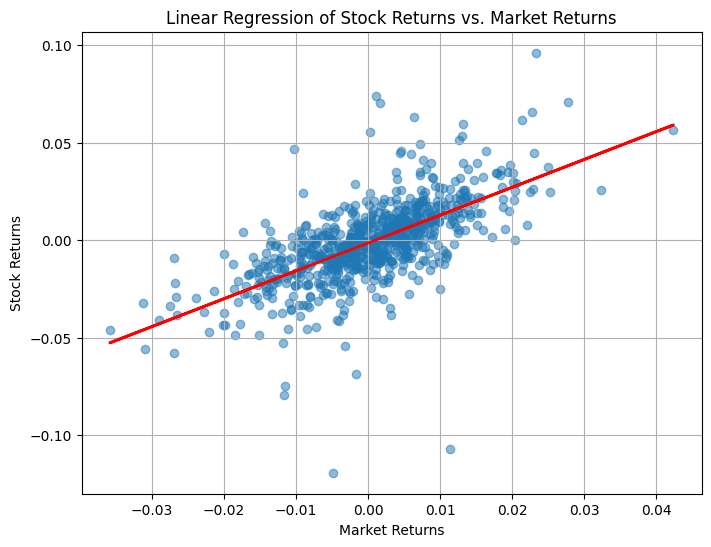

Annual Market Return: 7.0476%
Risk-Free Rate: 3.1500%
Market Risk Premium: 3.8976%
Stock: KER.PA
Start Date for Historical Data of Kering:  2022-03-31
Company Name: Kering SA
Market Cap: 23,760,756,736 EUR
Risk-Free Rate: 0.0315
Beta: 1.4279
Cost of Equity (CAPM): 0.0872
Cost of Debt: 0.0410
Total Book Value of Debt = Short Term Debt + Long Term Debt
Short-term Debt: 0.00 EUR
Long-term Debt: 10,556,000,000.00 EUR
Book Value of Debt: 10,556,000,000.00 EUR
Market Value of Debt using Bonds only: 11,810,291,115.86 EUR
Other Debt: 2,196,000,000.00 EUR
Total Market Value of Debt using Bonds Data from Kering's 2024 URD: 14,006,291,115.86 EUR
WACC: 0.0659
Not enough historical FCF data to calculate CAGR.

Historical Cash Flow Data (last 3 years):


,Year,OperatingCashFlow,CapEx,FreeCashFlow
0,2022,4.278000e+09,-1.071000e+09,3.207000e+09
1,2023,4.459000e+09,-2.611000e+09,1.848000e+09
2,2024,4.709000e+09,-3.309000e+09,1.400000e+09



FCF Forecast Comparison (10 years):


,Year,Avg yoy method,8% Growth Assumption,Multi-stage
0,1,"933,670,663.61","1,512,000,000.00","1,470,000,000.00"
1,2,"622,672,077.20","1,632,960,000.00","1,543,500,000.00"
2,3,"415,264,751.09","1,763,596,800.00","1,620,675,000.00"
3,4,"276,943,225.52","1,904,684,544.00","1,677,398,625.00"
4,5,"184,695,546.53","2,057,059,307.52","1,736,107,576.87"
5,6,"123,174,866.78","2,221,624,052.12","1,796,871,342.07"
6,7,"82,146,256.86","2,399,353,976.29","1,859,761,839.04"
7,8,"54,783,964.40","2,591,302,294.39","1,906,255,885.01"
8,9,"36,535,843.14","2,798,606,477.95","1,953,912,282.14"
9,10,"24,366,032.08","3,022,494,996.18","2,002,760,089.19"


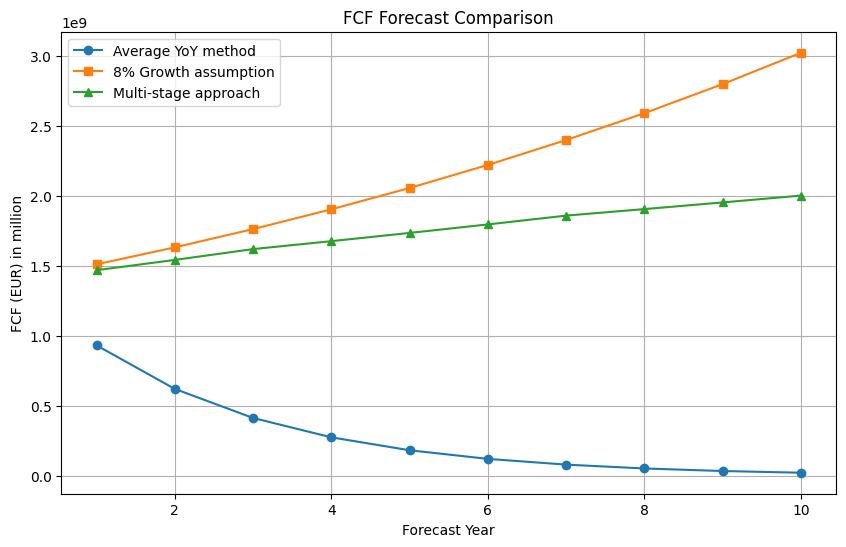


Valuation Method: DCF: 8% Growth Assumption
g (Terminal Growth Rate) assumption: 2.00%
Terminal Value calculation using Gordon Growth formula:
Terminal Value = Last FCF × (1 + g) ÷ (WACC - g)
Terminal Value = 3,022,494,996.18 × (1 + 2.00%) ÷ (6.59% - 2.00%)
Terminal Value: 67,140,056,401.82 EUR
Enterprise Value: 50,519,022,285.02 EUR
Equity Value: 39,176,022,285.02 EUR
Estimated Share Price: 319.54 EUR/share

Valuation Method: DCF: Average YoY Method
g (Terminal Growth Rate) assumption: 2.00%
Terminal Value calculation using Gordon Growth formula:
Terminal Value = Last FCF × (1 + g) ÷ (WACC - g)
Terminal Value = 24,366,032.08 × (1 + 2.00%) ÷ (6.59% - 2.00%)
Terminal Value: 541,253,755.62 EUR
Enterprise Value: 2,604,321,770.51 EUR
Equity Value: -8,738,678,229.49 EUR
Estimated Share Price: -71.28 EUR/share

Valuation Method: DCF: Multi-stage Approach
g (Terminal Growth Rate) assumption: 2.00%
Terminal Value calculation using Gordon Growth formula:
Terminal Value = Last FCF × (1 + g) ÷ (

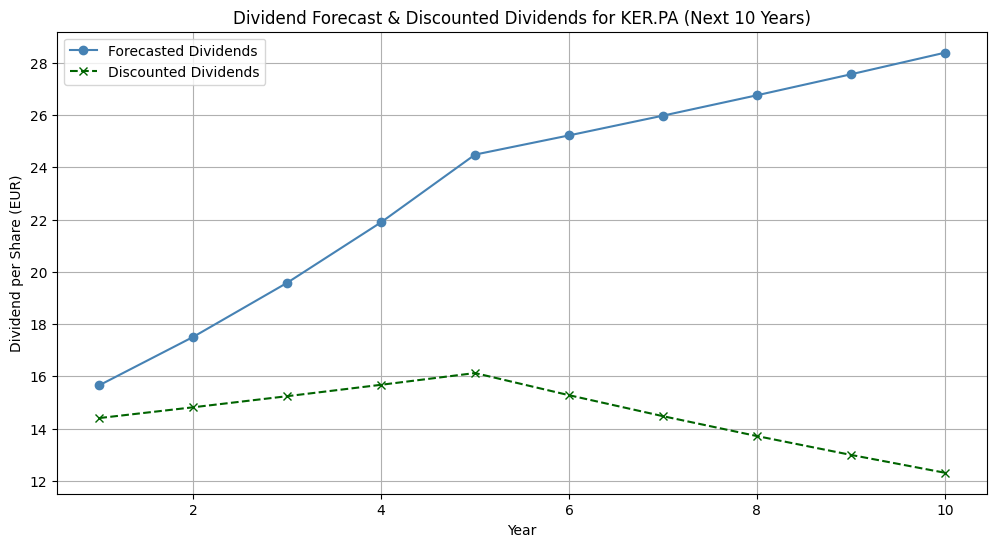

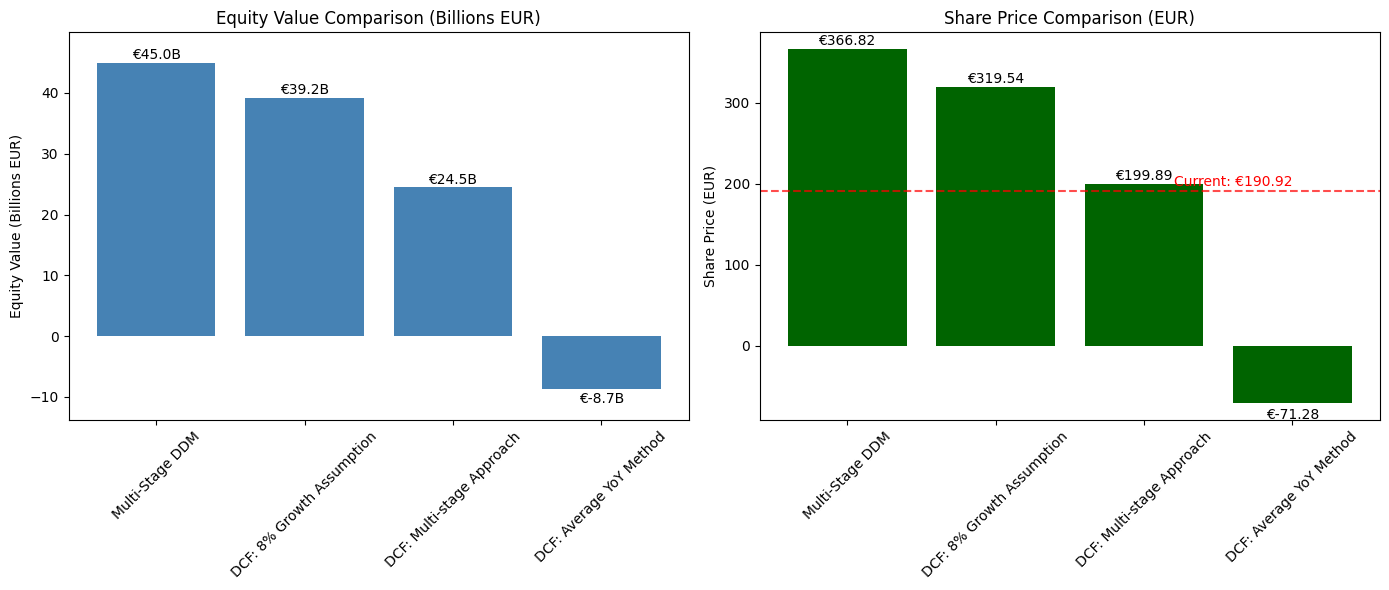


Current Market Price: 190.92 EUR/share
Comparable Companies EV/EBITDA Multiples:
- MC.PA: 14.38
- RMS.PA: 35.16
- BRBY.L: 16.22

Average EV/EBITDA: 21.92
Kering EBITDA: €3,520,000,000.00

Estimated Enterprise Value for Kering: €77,166,417,889.47
Estimated Equity Value for Kering: €66,649,417,889.47
Estimated Share Price: €543.62/share
Comparable Companies PER Multiples:
- MC.PA: 22.75
- RMS.PA: 54.98
- BRBY.L: 70.16

Average PER: 49.30
Kering Net Income: €1,132,999,936.00

Estimated Equity Value for Kering (PER method): €55,855,475,685.21
Estimated Share Price (PER method): €455.58/share


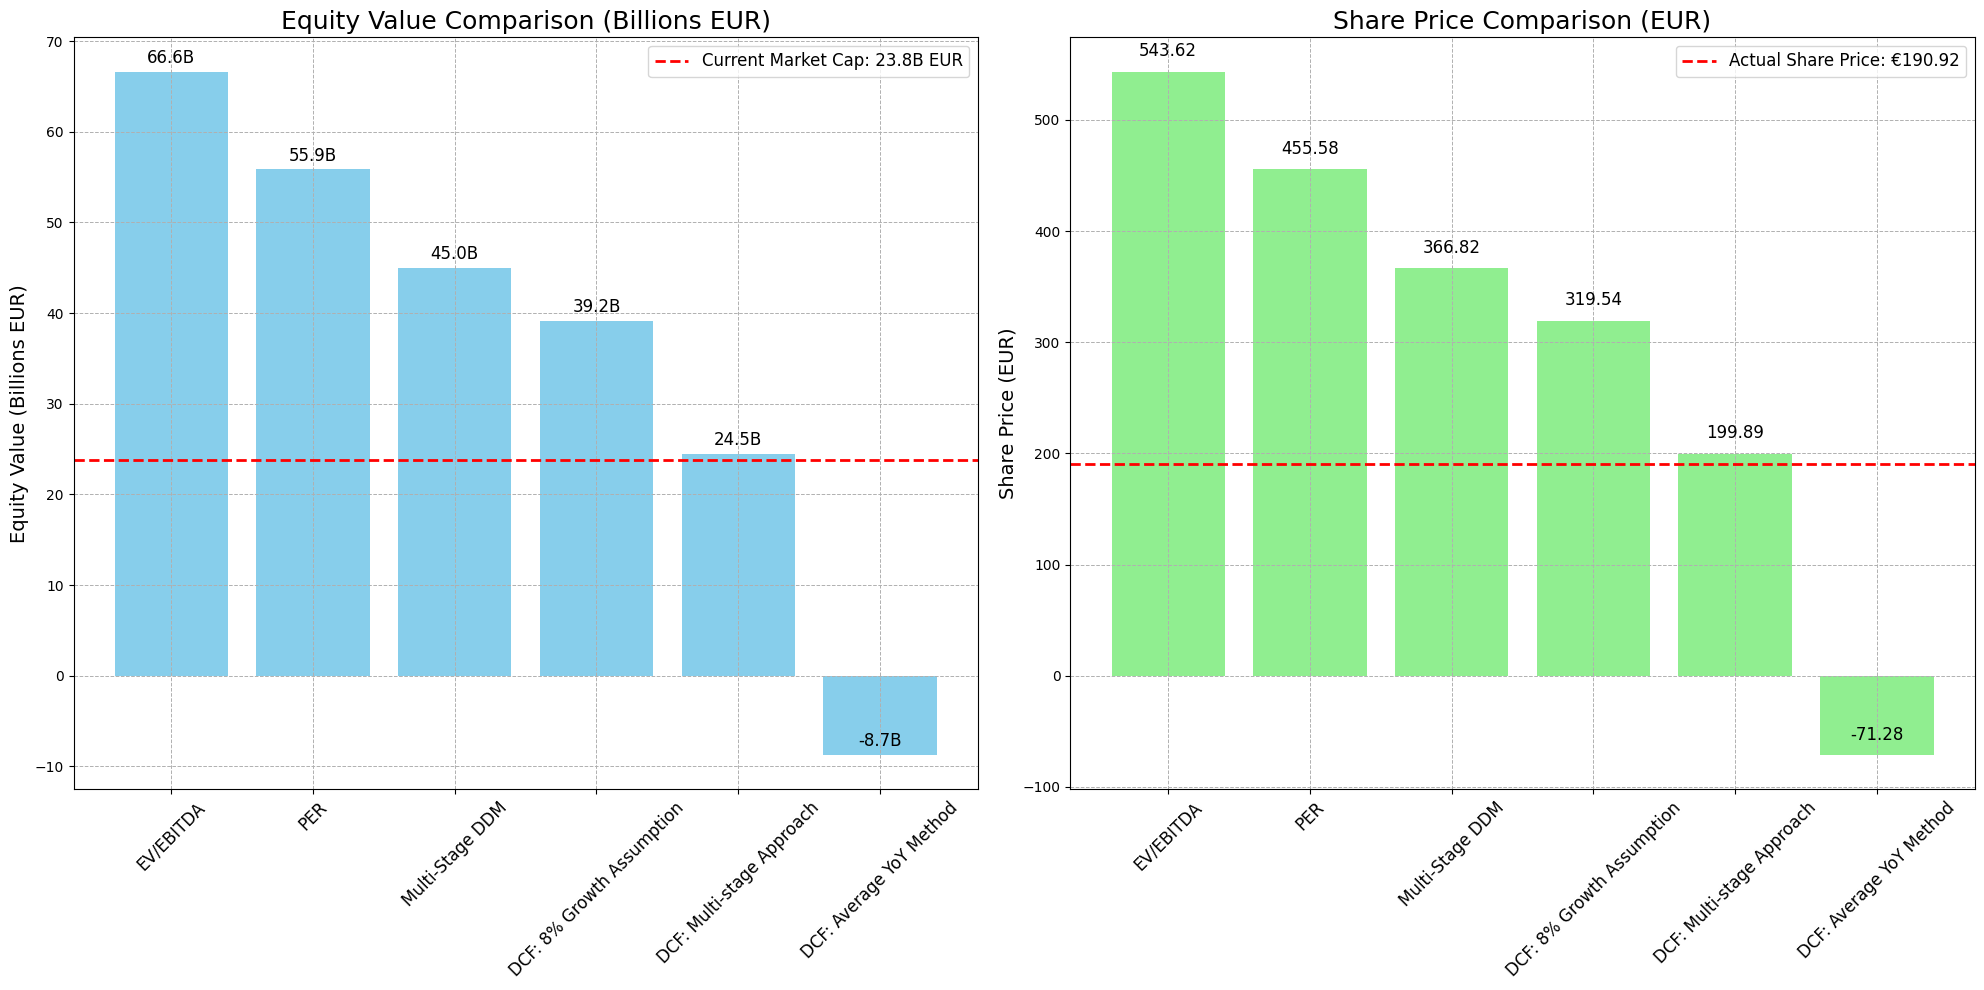

In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import math
from bs4 import BeautifulSoup

# Stock data (historical prices & financials)
end_date = dt.date(2025,3,30)
start_date = end_date - dt.timedelta(days=365 * 3)
def get_stock_data(ticker, start_date=start_date, end_date=end_date):
    stock = yf.Ticker(ticker)

    # Get historical stock prices
    price_data = stock.history(start=start_date, end=end_date)

    # Get key financials
    financials = {
        "company_name": stock.info.get("longName"),
        "sector": stock.info.get("sector"),
        "industry": stock.info.get("industry"),
        "market_cap": stock.info.get("marketCap"),
        "pe_ratio": stock.info.get("trailingPE"),
        "pb_ratio": stock.info.get("priceToBook"),
        "debt_to_equity": stock.info.get("debtToEquity"),
        "revenue": stock.info.get("totalRevenue"),
        "earnings": stock.info.get("netIncome"),
        "dividends": stock.info.get("dividendRate"),
        "total_debt": stock.info.get("totalDebt"),
        "interest_expense": stock.info.get("interestExpense"),
        "tax_rate": stock.info.get("taxRate"),
        "cash": stock.info.get("totalCash"),
        "shares_outstanding": stock.info.get("sharesOutstanding", 0)
    }

    financials_df = pd.DataFrame([financials])

    return price_data, financials, financials_df, stock

# CAC 40 index data (for Beta calculation)
def get_market_data(start_date=start_date, end_date=end_date):
    cac40 = yf.Ticker("^FCHI")  # CAC 40 index
    market_data = cac40.history(start=start_date, end=end_date)
    return market_data

# Risk-free rate (French 10-year treasury yield)
#def get_risk_free_rate():
#    url = "https://fred.stlouisfed.org/series/IRLTLT01FRM156N"
#    try:
#        response = requests.get(url)
#        return float(response.text.strip()) / 100  # Convert percentage to decimal
#    except:
#        return 0.0315  # Default 3.15% risk-free rate if fetching fails (February 2025 IR French treasury bond 10Y)

def get_risk_free_rate():

  # Saint Louis FED website
  url = 'https://fred.stlouisfed.org/series/IRLTLT01FRM156N'

  # Send a GET request with a user-agent
  headers = {"User-Agent": "Mozilla/5.0"}
  response = requests.get(url, headers=headers)

  # Check if the request was successful
  if response.status_code == 200:
      soup = BeautifulSoup(response.text, "html.parser")

      # Find all elements with the class 'series-meta-observation-value'
      data = soup.find_all(class_="series-meta-observation-value")

      # Extract, format, and print the values
      for item in data:
          value = float(item.get_text(strip=True))  # Convert text to float
          formatted_value = round(value, 2) / 100  # Round to 2 decimal places
          return formatted_value

  else:
      print(f"Failed to retrieve the page, status code: {response.status_code}")

# Beta
def calculate_beta(stock_prices, market_prices):
    # Calculate daily returns
    stock_returns = stock_prices["Close"].pct_change().dropna()
    market_returns = market_prices["Close"].pct_change().dropna()

    # Align the dates
    data = pd.DataFrame({"Stock": stock_returns, "Market": market_returns}).dropna()

    # linear regression (OLS)
    X = sm.add_constant(data["Market"])
    y = data["Stock"]
    model = sm.OLS(y, X).fit()
    beta = model.params["Market"]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data["Market"], data["Stock"], alpha=0.5)  # Scatter plot of data points
    plt.plot(data["Market"], model.predict(X), color='red', linewidth=2)  # Regression line

    plt.xlabel("Market Returns")
    plt.ylabel("Stock Returns")
    plt.title("Linear Regression of Stock Returns vs. Market Returns")
    plt.grid(True)

    plt.show()

    return beta

#Risk Premium
def calculate_market_risk_premium(market_data, risk_free_rate):
    # Calculate daily returns
    market_returns = market_data["Close"].pct_change().dropna()

    # Convert daily returns to annual returns assuming 252 trading days in a year
    annual_market_return = (1 + market_returns.mean()) ** 252 - 1

    # Market Risk Premium = Average Market Return - Risk-Free Rate
    market_risk_premium = annual_market_return - risk_free_rate

    print(f"Annual Market Return: {annual_market_return:.4%}")
    print(f"Risk-Free Rate: {risk_free_rate:.4%}")
    print(f"Market Risk Premium: {market_risk_premium:.4%}")

    return market_risk_premium

# Cost of Equity (CAPM)
def calculate_cost_of_equity(beta, risk_free_rate, market_risk_premium): #compute market risk premium with Historical Average Market Return - Historical Average Risk - Risk Free Rate
    cost_of_equity = risk_free_rate + beta * market_risk_premium
    return cost_of_equity

# Cost of Debt
def calculate_cost_of_debt(financials, risk_free_rate):
    if financials["total_debt"] == 0 or financials["total_debt"] is None or financials["interest_expense"] == 0 or financials["interest_expense"] is None:
      interest_rate = risk_free_rate + 0.0095 #2025 Ratings, Interest Coverage Ratios and Default Spread: https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ratings.html
    elif financials["total_debt"] and financials["interest_expense"]:
      interest_rate = financials["interest_expense"] / financials["total_debt"]
    else:
      interest_rate = risk_free_rate + 0.02  # Assume 2% credit spread if data is unavailable

    return interest_rate

def get_book_value_of_debt(ticker):
    stock = yf.Ticker(ticker)

    # Retrieve the balance sheet data
    balance_sheet = stock.balance_sheet

    if balance_sheet.empty:
        print("No balance sheet data found from yfinance. Returning 0.")
        return 0

    # Extract most recent balance sheet data (latest column)
    latest_balance_sheet = balance_sheet.iloc[:, 0]  # First (most recent) column

    # Extract relevant items from the balance sheet
    try:
        short_term_debt = latest_balance_sheet.get('Short Long Term Debt') or 0
        long_term_debt = latest_balance_sheet.get('Long Term Debt') or 0
    except KeyError:
        print("Error: 'Short Long Term Debt' or 'Long Term Debt' not found in the balance sheet.")
        return 0

    # Calculate total book value of debt
    total_book_value_of_debt = short_term_debt + long_term_debt

    return total_book_value_of_debt, short_term_debt, long_term_debt

def bond_present_value(face_value, coupon_rate, maturity_years, market_rate, currency, exchange_rates):
    """
    Compute the present value of a bond given its face value, coupon rate, maturity, market rate, and currency.
    Apply exchange rate if needed.
    """
    if currency != 'EUR':  # Convert to EUR using exchange rates
        face_value *= exchange_rates[currency]

    coupon_payment = face_value * (coupon_rate / 100)
    pv = 0

    # Convert maturity_years to an integer
    for t in range(1, math.ceil(maturity_years) + 1):
        pv += coupon_payment / ((1 + market_rate) ** t)

    pv += face_value / ((1 + market_rate) ** maturity_years)
    return pv

def detailed_market_value_of_debt(bond_data, market_rate=0.04, exchange_rates={'USD': 0.92, 'GBP': 1.20}):
    """
    Compute the total market value of debt by summing the present value of each bond.
    bond_data should be a list of tuples: (face_value, currency, coupon_rate, maturity_years)
    """
    total_value = 0
    for (face, currency, coupon, maturity) in bond_data:
        pv = bond_present_value(face, coupon, maturity, market_rate, currency, exchange_rates)
        total_value += pv
    return total_value

def years_until_maturity(issue_date, maturity_date):
    """Calculate years until maturity from issue date to maturity date."""
    issue_date = datetime.strptime(issue_date, "%m/%d/%y")
    maturity_date = datetime.strptime(maturity_date, "%m/%d/%y")
    return (maturity_date - issue_date).days / 365.25

# WACC
def calculate_wacc(financials, cost_of_equity, cost_of_debt, market_value_debt=None):
    E = financials.get("market_cap", 0) or 0

    # Use market value of debt if available, else fallback to book value (from Yahoo Finance)
    D = market_value_debt if market_value_debt and market_value_debt > 0 else financials.get("total_debt", 0) or 0

    tax_rate = financials.get("tax_rate", 0.271) or 0.271  # Default to Kering's 2024 rate if not available (page 64: https://www.kering.com/api/download-file/?path=Kering_2024_URD_EN_f8c45e2e74.pdf)

    if (E + D) == 0:
        return None  # Avoid division by zero

    wacc = (E / (E + D)) * cost_of_equity + (D / (E + D)) * cost_of_debt * (1 - tax_rate)
    return wacc

def get_historical_cash_flows(ticker, years=3):
    stock = yf.Ticker(ticker)
    cf_df = stock.cashflow

    if cf_df.empty:
        print("No historical cash flow data found from yfinance. Returning empty.")
        return pd.DataFrame()

    cf_transposed = cf_df.transpose()

    line_item_map = {
        'Operating Cash Flow': 'OperatingCashFlow',
        'Capital Expenditure': 'CapEx',
        # 'Free Cash Flow': 'FreeCashFlow',
    }

    data_list = []

    for year in cf_transposed.index:
        row_data = cf_transposed.loc[year]
        ocf = 0
        capex = 0

        for item_name, new_label in line_item_map.items():
            if item_name in row_data.index:
                val = row_data[item_name]
                if new_label == 'OperatingCashFlow':
                    ocf = val
                elif new_label == 'CapEx':
                    capex = val
                # elif new_label == 'FreeCashFlow':
                #     direct_fcf = val

        # If we are computing FCF from OCF + Capex (capex negative)
        fcf = ocf + capex

        data_list.append({
            'Year': str(year)[:4],
            'OperatingCashFlow': ocf,
            'CapEx': capex,
            'FreeCashFlow': fcf  # or direct_fcf if using 'Free Cash Flow'
        })

    # Sort by ascending year
    result = pd.DataFrame(data_list).sort_values(by='Year', ascending=True)

    # Keep only last 'years' rows
    if len(result) > years:
        result = result.iloc[-years:]

    return result.reset_index(drop=True)

def forecast_fcf_10_years(historical_fcf_df, method='average_growth', custom_growth=0.02):
    """
    Given a DataFrame with columns ['Year', 'FreeCashFlow'], produce
    a 10-year forecast of FCF.

    method options:
      - 'average_growth': use the average yoy growth from the last data points
      - 'custom': ignore historical yoy, use a user-defined custom_growth (e.g., 2% = 0.02)

    Returns: list of forecasted FCF for years 1..10
    """
    if historical_fcf_df.empty or 'FreeCashFlow' not in historical_fcf_df.columns:
        print("No historical FCF data available for forecast. Returning empty forecast.")
        return []

    # Extract the FCF column as a list
    fcf_values = historical_fcf_df['FreeCashFlow'].tolist()

    # If we have < 2 data points, fallback to 0% or custom
    if len(fcf_values) < 2:
        print("Not enough historical FCF points to estimate growth. Returning flat or custom forecast.")
        last_fcf = fcf_values[-1] if fcf_values else 0
        if method == 'custom':
            forecast = []
            current_fcf = last_fcf
            for _ in range(10):
                current_fcf *= (1 + custom_growth)
                forecast.append(current_fcf)
            return forecast
        else:
            # Just flat
            return [last_fcf]*10

    # If method is 'custom', ignore yoy
    if method == 'custom':
        last_fcf = fcf_values[-1]
        forecast = []
        current_fcf = last_fcf
        for _ in range(10):
            current_fcf *= (1 + custom_growth)
            forecast.append(current_fcf)
        return forecast

    # Otherwise, do the average yoy approach
    growth_rates = []
    for i in range(1, len(fcf_values)):
        prev = fcf_values[i-1]
        curr = fcf_values[i]
        if abs(prev) > 1e-9:  # to avoid /0
            growth = (curr - prev)/abs(prev)
            growth_rates.append(growth)

    if not growth_rates:
        # fallback to 0% if we couldn't compute yoy
        avg_growth = 0
    else:
        avg_growth = sum(growth_rates)/len(growth_rates)

    # Start forecast from last known actual FCF
    current_fcf = fcf_values[-1]

    # Generate 10 future points
    forecast = []
    for year in range(1, 11):
        current_fcf = current_fcf*(1 + avg_growth)
        forecast.append(current_fcf)

    return forecast

def forecast_fcf_10_years_multistage(last_fcf,
                                     first_3y_growth=0.05,
                                     next_4y_growth=0.035,
                                     final_3y_growth=0.025):
    forecast = []
    current = last_fcf

    # years 1-3
    for _ in range(3):
        current *= (1 + first_3y_growth)
        forecast.append(current)

    # years 4-7
    for _ in range(4):
        current *= (1 + next_4y_growth)
        forecast.append(current)

    # years 8-10
    for _ in range(3):
        current *= (1 + final_3y_growth)
        forecast.append(current)

    return forecast

def display_forecasts_table(yoy_list, custom_list, multi_list):
    df_forecasts = pd.DataFrame({
        "Year": range(1, 11),
        "Avg yoy method": yoy_list,
        "8% Growth Assumption": custom_list,
        "Multi-stage": multi_list
    })


    with pd.option_context('display.float_format', '{:,.2f}'.format):
        print("\nFCF Forecast Comparison (10 years):")
        display(df_forecasts)

def calculate_terminal_value(last_fcf, wacc, g):
    """
    Calculate the terminal value using the perpetual growth model.

    Parameters:
      last_fcf: Free cash flow in the final forecast year (e.g., year 10).
      wacc: Weighted Average Cost of Capital (as a decimal).
      g: Terminal growth rate (as a decimal).

    Returns:
      Terminal Value.
    """
    if wacc <= g:
        raise ValueError("WACC must be greater than the terminal growth rate (g).")

    terminal_value = last_fcf * (1 + g) / (wacc - g)
    return terminal_value


def calculate_equity_value(enterprise_value, official_total_debt, official_cash,
                           non_controlling_interest=0, preferred_stock=0):

    equity_value = enterprise_value - official_total_debt + official_cash - non_controlling_interest - preferred_stock
    return equity_value

def compute_and_display_values(fcfs, wacc, terminal_growth_rate, official_total_debt, official_cash,
                               official_non_controlling_interest, official_preferred_stock, method_name, shares_outstanding):

    discounted_fcfs = [fcf / ((1 + wacc) ** (year + 1)) for year, fcf in enumerate(fcfs)]
    present_value_fcfs = sum(discounted_fcfs)

    terminal_value = calculate_terminal_value(fcfs[-1], wacc, terminal_growth_rate)
    present_value_terminal = terminal_value / ((1 + wacc) ** len(fcfs))

    enterprise_value = present_value_fcfs + present_value_terminal
    equity_value = calculate_equity_value(
        enterprise_value,
        official_total_debt,
        official_cash,
        official_non_controlling_interest,
        official_preferred_stock
    )

    estimated_share_price = equity_value / shares_outstanding if shares_outstanding else None

    print(f"\nValuation Method: {method_name}")
    print(f"g (Terminal Growth Rate) assumption: {terminal_growth_rate:.2%}")
    print("Terminal Value calculation using Gordon Growth formula:")
    print("Terminal Value = Last FCF × (1 + g) ÷ (WACC - g)")
    print(f"Terminal Value = {fcfs[-1]:,.2f} × (1 + {terminal_growth_rate:.2%}) ÷ ({wacc:.2%} - {terminal_growth_rate:.2%})")
    print(f"Terminal Value: {terminal_value:,.2f} EUR")
    print(f"Enterprise Value: {enterprise_value:,.2f} EUR")
    print(f"Equity Value: {equity_value:,.2f} EUR")

    if estimated_share_price:
        print(f"Estimated Share Price: {estimated_share_price:.2f} EUR/share")
    else:
        print("Shares outstanding data unavailable, cannot calculate share price.")

    return equity_value, estimated_share_price

def dividend_discount_model(ticker, cost_of_equity, forecast_years=10,
                           initial_high_growth_years=5, stable_growth_rate=0.03,
                           shares_outstanding=None):
    print("\n----- Discounted Dividend Model -----")
    stock = yf.Ticker(ticker)
    dividends = stock.dividends

    if dividends.empty:
        print("No dividend history available.")
        return None, None

    # Aggregate dividends by year to get total annual payout
    dividends = dividends.resample('YE').sum()

    # Remove the latest year if it appears incomplete
    if dividends.iloc[-1] < dividends.iloc[-2] * 0.5:
        print(f"\nSkipping incomplete year {dividends.index[-1].year} (Detected dividend: {dividends.iloc[-1]:.2f} EUR)")
        dividends = dividends.iloc[:-1]

    print("\nAnnual Dividends (Last 10 years):")
    print(dividends.tail(10))

    latest_year_dividend = dividends.iloc[-1]
    print(f"\nLatest annual dividend (automatically detected): {latest_year_dividend:.2f} EUR")

    if shares_outstanding is None:
        shares_outstanding = stock.info.get("sharesOutstanding", 0)
    if shares_outstanding == 0:
        print("Shares outstanding data unavailable.")
        return None, None

    # Calculate 5-year CAGR
    if len(dividends) >= 5:
        start_dividend = dividends.iloc[-5]
        end_dividend = dividends.iloc[-1]
        historical_growth_rate = (end_dividend / start_dividend) ** (1/5) - 1
    else:
        print("Not enough data for a 5-year CAGR calculation. Using fallback growth rate.")
        historical_growth_rate = stable_growth_rate

    print(f"\nAutomatically Calculated 5-Year CAGR: {historical_growth_rate:.2%}")

    if historical_growth_rate > 0.15:
        print("Warning: The calculated CAGR is unusually high. Double-check the dividend data for irregularities.")

    # Use latest annual dividend per share as starting point
    current_dividend = latest_year_dividend

    # Forecast dividends for initial high-growth phase
    dividend_forecast = []
    forecasted_dividends = []
    discounted_dividends = []

    for year in range(1, forecast_years + 1):
        if year <= initial_high_growth_years:
            growth_rate = historical_growth_rate
        else:
            growth_rate = stable_growth_rate
        current_dividend *= (1 + growth_rate)

        # Store forecasted dividends
        dividend_forecast.append(current_dividend * shares_outstanding)
        forecasted_dividends.append(current_dividend)  # Per-share dividend

        # Calculate discounted dividend
        discounted_dividend = (current_dividend * shares_outstanding) / ((1 + cost_of_equity) ** year)
        discounted_dividends.append(discounted_dividend)

    # Terminal value calculation
    terminal_dividend = dividend_forecast[-1] * (1 + stable_growth_rate)
    terminal_value = terminal_dividend / (cost_of_equity - stable_growth_rate)
    discounted_terminal_value = terminal_value / ((1 + cost_of_equity) ** forecast_years)

    # Calculate total equity value
    equity_value_ddm = sum(discounted_dividends) + discounted_terminal_value
    estimated_share_price = equity_value_ddm / shares_outstanding

    print("\n----- Valuation Summary -----")
    print(f"\nEstimated Equity Value: {equity_value_ddm:,.2f} EUR")
    print(f"Estimated Share Price: {estimated_share_price:.2f} EUR/share")
    print(f"Total Terminal Value (Discounted): {discounted_terminal_value:,.2f} EUR")
    print(f"Shares Outstanding: {shares_outstanding:,.0f}")
    print(f"Cost of Equity: {cost_of_equity:.2%}")
    print(f"Initial High-Growth Phase (Years 1-5) CAGR: {historical_growth_rate:.2%}")
    print(f"Stable Growth Rate (Years 6+): {stable_growth_rate:.2%}")

    # Plot forecasted dividends & discounted dividends
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, forecast_years + 1), forecasted_dividends, marker='o', linestyle='-', color='steelblue', label='Forecasted Dividends')
    plt.plot(range(1, forecast_years + 1), [div / shares_outstanding for div in discounted_dividends], marker='x', linestyle='--', color='darkgreen', label='Discounted Dividends')

    plt.title(f'Dividend Forecast & Discounted Dividends for {ticker} (Next {forecast_years} Years)')
    plt.xlabel('Year')
    plt.ylabel('Dividend per Share (EUR)')
    plt.grid(True)
    plt.legend()
    plt.show()

    return equity_value_ddm, estimated_share_price

def plot_valuation_comparison(valuation_results):
    """
    Create a bar chart comparing different valuation methods.

    Parameters:
        valuation_results: Dictionary with method names as keys and (equity_value, share_price) tuples as values
    """
    # Convert valuation_results dictionary to a list of tuples and sort by equity value (descending)
    sorted_results = sorted(valuation_results.items(), key=lambda x: x[1][0], reverse=True)

    # Unpack sorted results into methods, equity values, and share prices
    methods = [item[0] for item in sorted_results]
    equity_values = [item[1][0] / 1e9 for item in sorted_results]  # Convert to billions
    share_prices = [item[1][1] for item in sorted_results]

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot equity values (in billions)
    bars1 = ax1.bar(methods, equity_values, color='steelblue')
    ax1.set_title('Equity Value Comparison (Billions EUR)')
    ax1.set_ylabel('Equity Value (Billions EUR)')
    ax1.set_ylim(min(equity_values) - 5, max(equity_values) + 5)
    ax1.tick_params(axis='x', rotation=45)

    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height >= 0 else height - 0.5,
                f'€{height:.1f}B', ha='center', va='bottom' if height >= 0 else 'top')

    # Plot share prices
    bars2 = ax2.bar(methods, share_prices, color='darkgreen')
    ax2.set_title('Share Price Comparison (EUR)')
    ax2.set_ylabel('Share Price (EUR)')
    ax2.set_ylim(min(share_prices) - 20, max(share_prices) + 20)
    ax2.tick_params(axis='x', rotation=45)

    # Add value labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1 if height >= 0 else height - 5,
                f'€{height:.2f}', ha='center', va='bottom' if height >= 0 else 'top')

    # Add current market price reference line if available
    current_price = yf.Ticker("KER.PA").info.get("currentPrice")
    if current_price:
        ax2.axhline(y=current_price, color='red', linestyle='--', alpha=0.7)
        ax2.text(len(methods)-1, current_price + 2, f'Current: €{current_price:.2f}',
                color='red', ha='right', va='bottom')

    plt.tight_layout()
    plt.show()

def calculate_cagr(start_value, end_value, periods):
    """
    Compute Compound Annual Growth Rate (CAGR).
    """
    if start_value <= 0 or end_value <= 0:
        return None
    return (end_value / start_value) ** (1 / periods) - 1

def compute_and_display_cagr(ticker, cashflow_years=5, dividend_years=5):
    stock = yf.Ticker(ticker)

    # Get cash flow data
    cf_df = stock.cashflow
    if cf_df.empty:
        print("Cash flow data not available for CAGR calculation.")
        return

    cf_df = cf_df.T

    ocf_key = None
    capex_key = None
    for key in cf_df.columns:
        if 'Operating Cash Flow' in key:
            ocf_key = key
        if 'Capital Expenditure' in key:
            capex_key = key

    if ocf_key is None or capex_key is None:
        print("Required cash flow data not found for CAGR calculation.")
        return

    cf_df = cf_df[[ocf_key, capex_key]].dropna()
    cf_df.columns = ['OperatingCF', 'CapEx']
    cf_df['FCF'] = cf_df['OperatingCF'] + cf_df['CapEx']  # CapEx is negative

    cf_df = cf_df.sort_index()
    if len(cf_df) < 2:
        print("Not enough historical FCF data to calculate CAGR.")
        return

    fcf_start = cf_df['FCF'].iloc[0]
    fcf_end = cf_df['FCF'].iloc[-1]
    fcf_periods = len(cf_df) - 1
    fcf_cagr = calculate_cagr(fcf_start, fcf_end, fcf_periods)

    # Dividend CAGR
    dividends = stock.dividends.resample('YE').sum().dropna()
    dividends = dividends.sort_index()
    if len(dividends) >= 2:
        dividend_start = dividends.iloc[0]
        dividend_end = dividends.iloc[-1]
        dividend_periods = len(dividends) - 1
        dividend_cagr = calculate_cagr(dividend_start, dividend_end, dividend_periods)
    else:
        dividend_cagr = None

    # Display Results
    print("\n----- CAGR Calculation -----")
    if fcf_cagr is not None:
        print(f"Free Cash Flow CAGR over {fcf_periods} years: {fcf_cagr:.2%}")
    else:
        print("FCF CAGR not computable.")

    if dividend_cagr is not None:
        print(f"Dividend CAGR over {dividend_periods} years: {dividend_cagr:.2%}")
    else:
        print("Dividend CAGR not computable.")
    print("----------------------------\n")

def plot_metrics_comparison(valuation_results, current_price, current_market_cap):
    """
    Plot Equity Value and Share Price comparison for different valuation models.

    Parameters:
        valuation_results: Dictionary with method names as keys and (equity_value, share_price) tuples as values
        current_price: Current market share price to be displayed as a reference line
        current_market_cap: Current market capitalization to be displayed as a reference line
    """
    # Convert valuation_results dictionary to a list of tuples and sort by equity value (descending)
    sorted_results = sorted(valuation_results.items(), key=lambda x: x[1][0], reverse=True)

    # Unpack sorted results into methods, equity values, and share prices
    methods = [item[0] for item in sorted_results]
    equity_values = [item[1][0] / 1e9 for item in sorted_results]  # Convert to billions
    share_prices = [item[1][1] for item in sorted_results]

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot Equity Values (in billions EUR)
    bars1 = ax1.bar(methods, equity_values, color='skyblue')
    ax1.set_title('Equity Value Comparison (Billions EUR)', fontsize=18)
    ax1.set_ylabel('Equity Value (Billions EUR)', fontsize=14)
    ax1.tick_params(axis='x', rotation=45, labelsize=12)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Add value labels above each bar
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}B', ha='center', va='bottom', fontsize=12)

    # Add a line for current market cap
    if current_market_cap:
        ax1.axhline(y=current_market_cap / 1e9, color='red', linestyle='--', linewidth=2, label=f'Current Market Cap: {current_market_cap / 1e9:.1f}B EUR')
        ax1.legend(fontsize=12)

    # Plot Share Prices (in EUR)
    bars2 = ax2.bar(methods, share_prices, color='lightgreen')
    ax2.set_title('Share Price Comparison (EUR)', fontsize=18)
    ax2.set_ylabel('Share Price (EUR)', fontsize=14)
    ax2.tick_params(axis='x', rotation=45, labelsize=12)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Add value labels above each bar
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 10, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

    # Add the actual share price line
    if current_price:
        ax2.axhline(y=current_price, color='red', linestyle='--', linewidth=2, label=f'Actual Share Price: €{current_price:.2f}')
        ax2.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

def get_ev_ebitda(ticker):
    stock = yf.Ticker(ticker)
    ev = stock.info.get('enterpriseValue')
    ebitda = stock.info.get('ebitda')
    if ev and ebitda:
        return ev / ebitda
    else:
        return None

def get_pe_ratio(ticker):
    """Retrieves the trailing Price-to-Earnings (PER) ratio for a given ticker."""
    stock = yf.Ticker(ticker)
    return stock.info.get("trailingPE")

# -------------------MAIN-------------------
def main():
    print("Start Date for Historical Data of Kering: ", start_date)
    print("End Date for Historical Data of Kering: ", end_date)
    ticker = "KER.PA"

    stock_data, financials, financials_df, stock = get_stock_data(ticker)
    market_data = get_market_data()
    risk_free_rate = get_risk_free_rate()

    beta = calculate_beta(stock_data, market_data)
    market_risk_premium = calculate_market_risk_premium(market_data, risk_free_rate)
    cost_of_equity = calculate_cost_of_equity(beta, risk_free_rate, market_risk_premium)
    cost_of_debt = calculate_cost_of_debt(financials, risk_free_rate)

  # Hardcoded bonds data from Kering’s Universal Registration Document (consolidated financial statements)
    detailed_bond_data = [
        (500, 'EUR', 2.75, years_until_maturity("4/8/14", "4/8/24")),
        (50, 'EUR', 1.6, years_until_maturity("4/16/15", "4/16/35")),
        (500, 'EUR', 1.25, years_until_maturity("5/10/16", "5/10/26")),
        (300, 'EUR', 1.5, years_until_maturity("4/5/17", "4/5/27")),
        (600, 'EUR', 0.75, years_until_maturity("5/13/20", "5/13/28")),
        (750, 'EUR', 1.25, years_until_maturity("5/5/22", "5/5/25")),
        (750, 'EUR', 1.88, years_until_maturity("5/5/22", "5/5/30")),
        (200, 'USD', 3.64, years_until_maturity("5/27/22", "5/27/27")),
        (750, 'EUR', 3.25, years_until_maturity("2/27/23", "2/27/29")),
        (750, 'EUR', 3.38, years_until_maturity("2/27/23", "2/27/33")),
        (750, 'EUR', 3.75, years_until_maturity("9/5/23", "9/5/25")),
        (750, 'EUR', 3.63, years_until_maturity("9/5/23", "9/5/27")),
        (1000, 'EUR', 3.63, years_until_maturity("9/5/23", "9/5/31")),
        (1300, 'EUR', 3.88, years_until_maturity("9/5/23", "9/5/35")),
        (400, 'GBP', 5.13, years_until_maturity("11/23/23", "11/23/26")),
        (400, 'GBP', 5.00, years_until_maturity("11/23/23", "11/23/32")),
        (1000, 'EUR', 3.38, years_until_maturity("3/11/24", "3/11/32")),
        (750, 'EUR', 3.63, years_until_maturity("3/11/24", "3/11/36")),
        (750, 'EUR', 3.63, years_until_maturity("11/21/24", "11/21/34"))
    ]

    other_debt_market_value = (139 + 209 + 854 + 994) * 1_000_000
    bonds_market_value = detailed_market_value_of_debt(detailed_bond_data) * 1_000_000
    total_market_value = bonds_market_value + other_debt_market_value

    book_value_of_debt, short_term_debt, long_term_debt = get_book_value_of_debt(ticker)

    wacc = calculate_wacc(financials, cost_of_equity, cost_of_debt, market_value_debt=total_market_value)

    print(f"Stock: {ticker}")
    print("Start Date for Historical Data of Kering: ", start_date)
    print(f"Company Name: {financials['company_name']}")
    print(f"Market Cap: {financials['market_cap']:,} EUR")
    print(f"Risk-Free Rate: {risk_free_rate:.4f}")
    print(f"Beta: {beta:.4f}")
    print(f"Cost of Equity (CAPM): {cost_of_equity:.4f}")
    print(f"Cost of Debt: {cost_of_debt:.4f}")
    print("Total Book Value of Debt = Short Term Debt + Long Term Debt")
    print(f"Short-term Debt: {short_term_debt:,.2f} EUR")
    print(f"Long-term Debt: {long_term_debt:,.2f} EUR")
    print(f"Book Value of Debt: {book_value_of_debt:,.2f} EUR")
    print(f"Market Value of Debt using Bonds only: {bonds_market_value:,.2f} EUR")
    print(f"Other Debt: {other_debt_market_value:,.2f} EUR")
    print(f"Total Market Value of Debt using Bonds Data from Kering's 2024 URD: {total_market_value:,.2f} EUR")
    print(f"WACC: {wacc:.4f}")

    # Calculate and display CAGR for FCF and Dividends
    compute_and_display_cagr(ticker)

    hist_cf = get_historical_cash_flows(ticker, years=3)
    print("\nHistorical Cash Flow Data (last 3 years):")
    display(hist_cf)

    fcf_projection_yoy = forecast_fcf_10_years(hist_cf, method='average_growth')
    fcf_projection_custom = forecast_fcf_10_years(hist_cf, method='custom', custom_growth=0.08)
    multistage_fcf = forecast_fcf_10_years_multistage(
        last_fcf=hist_cf['FreeCashFlow'].iloc[-1],
        first_3y_growth=0.05,
        next_4y_growth=0.035,
        final_3y_growth=0.025
    )

    display_forecasts_table(fcf_projection_yoy, fcf_projection_custom, multistage_fcf)

    # Plot FCF forecasts
    years = range(1, 11)
    plt.figure(figsize=(10, 6))
    plt.plot(years, fcf_projection_yoy, marker='o', label="Average YoY method")
    plt.plot(years, fcf_projection_custom, marker='s', label="8% Growth assumption")
    plt.plot(years, multistage_fcf, marker='^', label="Multi-stage approach")
    plt.xlabel("Forecast Year")
    plt.ylabel("FCF (EUR) in million")
    plt.title("FCF Forecast Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Official financial data from your statements
    official_total_debt = 14035e6  # €14,035 million from condensed balance sheet (p.65-66 URD Kering)
    official_cash = 3518e6         # €3,518 million from condensed balance sheet (p.65-66 URD Kering)
    official_non_controlling_interest = 826e6  # €826 million explicitly provided (p.65 Condensed Balance Sheet URD Kering)
    official_preferred_stock = 0   # Kering does not appear to have any preferred stock

    # Get shares outstanding
    shares_outstanding = financials.get('shares_outstanding', 0)
    if shares_outstanding == 0:
        print("Warning: Shares outstanding not found. Using default value from Yahoo Finance.")
        shares_outstanding = stock.info.get("sharesOutstanding", 125_222_333)  # Use a default value if not available

    # Dictionary to store valuation results
    valuation_results = {}

    methods = {
        "DCF: 8% Growth Assumption": fcf_projection_custom,
        "DCF: Average YoY Method": fcf_projection_yoy,
        "DCF: Multi-stage Approach": multistage_fcf
    }

    for method_name, fcf_forecast in methods.items():
        equity_value, share_price = compute_and_display_values(
            fcf_forecast,
            wacc,
            terminal_growth_rate=0.02,
            official_total_debt=official_total_debt,
            official_cash=official_cash,
            official_non_controlling_interest=official_non_controlling_interest,
            official_preferred_stock=official_preferred_stock,
            method_name=method_name,
            shares_outstanding=shares_outstanding
        )
        # Store results in the dictionary
        valuation_results[method_name] = (equity_value, share_price)

    print("First 3Y growth = 5%, Next 4Y Growth = 3.5%, Final 3Y Growth = 2.5%")

    # Calculate DDM Valuation
    equity_value_ddm, share_price_ddm = dividend_discount_model(
        ticker,
        cost_of_equity,
        forecast_years=10,
        initial_high_growth_years=5,
        stable_growth_rate=0.03,  # Using a reasonable terminal growth rate to start with
        shares_outstanding=shares_outstanding
    )

    if equity_value_ddm and share_price_ddm:
        valuation_results["Multi-Stage DDM"] = (equity_value_ddm, share_price_ddm)

    # Plot comparison of valuation methods
    plot_valuation_comparison(valuation_results)

    # Display current market price for comparison
    current_price = stock.info.get("currentPrice")
    if current_price:
        print(f"\nCurrent Market Price: {current_price:.2f} EUR/share")

    # Define comparable companies
    comparables = ["MC.PA", "RMS.PA", "BRBY.L"]

    # Retrieve EV/EBITDA multiples for comparables
    multiples = {}
    for comp in comparables:
        ev_ebitda = get_ev_ebitda(comp)
        if ev_ebitda:
            multiples[comp] = ev_ebitda

    # Calculate average EV/EBITDA multiple of comparables
    average_ev_ebitda = sum(multiples.values()) / len(multiples)

    # **CHANGE:** Get Kering's EBITDA
    kering = yf.Ticker(ticker)  # Assuming 'ticker' is "KER.PA"
    kering_ebitda = kering.info.get('ebitda')

    # Estimate Kering's Enterprise Value and Equity Value using EV/EBITDA method
    estimated_enterprise_value = average_ev_ebitda * kering_ebitda
    # ... (rest of your existing code) ...

    # Retrieve PER multiples for comparables
    pe_multiples = {}
    for comp in comparables:
        pe = get_pe_ratio(comp)  # **CHANGE:** You'll need to define get_pe_ratio
        if pe:
            pe_multiples[comp] = pe

    # Estimate Kering's Enterprise Value and Equity Value using EV/EBITDA method
    estimated_enterprise_value = average_ev_ebitda * kering_ebitda
    official_total_debt = 14035e6  # €14,035 million
    official_cash = 3518e6         # €3,518 million
    estimated_equity_value = estimated_enterprise_value - official_total_debt + official_cash
    shares_outstanding = kering.info.get('sharesOutstanding')
    estimated_share_price = estimated_equity_value / shares_outstanding

    # Retrieve PER multiples for comparables
    pe_multiples = {}
    for comp in comparables:
        pe = get_pe_ratio(comp)
        if pe:
            pe_multiples[comp] = pe

    # Calculate average PER of comparables
    average_pe = sum(pe_multiples.values()) / len(pe_multiples)

    # Fetch Kering's Net Income
    kering_net_income = kering.info.get('netIncomeToCommon')

    # Estimate Equity Value for Kering using PER method
    estimated_equity_value_per = average_pe * kering_net_income
    estimated_share_price_per = estimated_equity_value_per / shares_outstanding

    # Store all results in a single dictionary
    valuation_results.update({
        "EV/EBITDA": (estimated_equity_value, estimated_share_price),
        "PER": (estimated_equity_value_per, estimated_share_price_per)
    })

    # Display comparable multiples
    print(f"Comparable Companies EV/EBITDA Multiples:")
    for comp, multiple in multiples.items():
        print(f"- {comp}: {multiple:.2f}")

    print(f"\nAverage EV/EBITDA: {average_ev_ebitda:.2f}")
    print(f"Kering EBITDA: €{kering_ebitda:,.2f}")
    print(f"\nEstimated Enterprise Value for Kering: €{estimated_enterprise_value:,.2f}")
    print(f"Estimated Equity Value for Kering: €{estimated_equity_value:,.2f}")
    print(f"Estimated Share Price: €{estimated_share_price:.2f}/share")

    print("Comparable Companies PER Multiples:")
    for comp, multiple in pe_multiples.items():
        print(f"- {comp}: {multiple:.2f}")

    print(f"\nAverage PER: {average_pe:.2f}")
    print(f"Kering Net Income: €{kering_net_income:,.2f}")
    print(f"\nEstimated Equity Value for Kering (PER method): €{estimated_equity_value_per:,.2f}")
    print(f"Estimated Share Price (PER method): €{estimated_share_price_per:.2f}/share")

    # Plot comparison of valuation methods
    current_price = stock.info.get("currentPrice")
    current_market_cap = stock.info.get("marketCap")

    if current_price and current_market_cap:
        plot_metrics_comparison(valuation_results, current_price, current_market_cap)


if __name__ == "__main__":
    main()

In [ ]:
stock = yf.Ticker("KER.PA")
cf_df = stock.cashflow
balance_sheet = stock.balance_sheet
statement = stock.financials
dividend = stock.dividends
display(statement)
display(balance_sheet)
display(cf_df)
display(dividend)

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-65582000.0,-28298842.428538,-66998000.0,-93956000.0,NaN
Tax Rate For Calcs,0.271,0.274746,0.278,0.283,NaN
Normalized EBITDA,4909000000.0,6672000000.0,7182000000.0,6392000000.0,NaN
Total Unusual Items,-242000000.0,-103000000.0,-200000000.0,-263000000.0,NaN
Total Unusual Items Excluding Goodwill,-242000000.0,-103000000.0,-241000000.0,-332000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,1133000000.0,2983000000.0,3613000000.0,3165000000.0,NaN
Reconciled Depreciation,2113000000.0,1823000000.0,1666000000.0,1453000000.0,NaN
Reconciled Cost Of Revenue,4513000000.0,4639000000.0,5153000000.0,4577000000.0,NaN
EBITDA,4667000000.0,6569000000.0,6982000000.0,6129000000.0,NaN
EBIT,2554000000.0,4746000000.0,5316000000.0,4676000000.0,NaN


,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,819085.0,838847.0,1850408.0,624211.0,NaN
Ordinary Shares Number,122601693.0,122580181.0,122220370.0,124068705.0,NaN
Share Issued,123420778.0,123419028.0,124070778.0,124692916.0,NaN
Net Debt,10517000000.0,7839000000.0,1624000000.0,NaN,1737400000.0
Total Debt,20142000000.0,17156000000.0,11192000000.0,9592000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,3560000000.0,3922000000.0,4336000000.0,5249000000.0,NaN
Other Short Term Investments,42000000.0,136000000.0,NaN,NaN,NaN
Cash And Cash Equivalents,3518000000.0,3922000000.0,4336000000.0,5249000000.0,NaN
Cash Equivalents,NaN,819000000.0,330000000.0,1924000000.0,872100000.0


,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,1400000000.0,1848000000.0,3207000000.0,3942000000.0,NaN
Repurchase Of Capital Stock,NaN,NaN,NaN,-538300000.0,-54100000.0
Repayment Of Debt,-919000000.0,-957000000.0,-904000000.0,-583000000.0,NaN
Issuance Of Debt,2493000000.0,6379000000.0,2085000000.0,215000000.0,NaN
Capital Expenditure,-3309000000.0,-2611000000.0,-1071000000.0,-934000000.0,NaN
End Cash Position,3309000000.0,3650000000.0,4094000000.0,4516000000.0,NaN
Beginning Cash Position,3650000000.0,4094000000.0,4516000000.0,3000000000.0,NaN
Effect Of Exchange Rate Changes,31000000.0,18000000.0,222000000.0,21000000.0,NaN
Changes In Cash,-372000000.0,-462000000.0,-644000000.0,1495000000.0,NaN
Other Cash Adjustment Inside Changein Cash,NaN,0.0,-8000000.0,-2000000.0,-4300000.0


,Dividends
Date,
2000-07-03 00:00:00+02:00,1.780600
2001-06-08 00:00:00+02:00,2.180020
2002-06-07 00:00:00+02:00,2.300000
2003-06-06 00:00:00+02:00,2.300000
2004-06-04 00:00:00+02:00,3.600000
2005-06-03 00:00:00+02:00,2.520000
2006-06-02 00:00:00+02:00,2.720000
2006-06-13 00:00:00+02:00,0.740480
2007-06-01 00:00:00+02:00,3.000000
